## ! Deprecated

In [1]:
import numpy as np
import matplotlib
import matplotlib.colors as mplcolors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import sys


def random_mpl_color_rgb():
    return (np.random.uniform(), np.random.uniform(), np.random.uniform())


def random_mpl_color_rgba(alpha=0.25):
    rgba_tup = random_mpl_color_rgb() + (alpha,)
    return rgba_tup


def random_mpl_color_rgb_rgba(alpha=0.25):
    """
    generate a pair of rgb and rgba color, both of them have same R G B value.
    """
    rgb_tup = random_mpl_color_rgb()
    rgba_tup = rgb_tup + (alpha,)
    return rgb_tup, rgba_tup


class Boite:
    def __init__(self, point_ref, longeur, largeur, hauteur):
        assert isinstance(point_ref, tuple)
        assert len(point_ref) == 3
        self.x = point_ref[0]
        self.y = point_ref[1]
        self.z = point_ref[2]
        self.longeur = longeur
        self.largeur = largeur
        self.hauteur = hauteur

        # fristly we think the reference point is at the origin
        self._temp_sommets = np.array([[-longeur / 2.0, -largeur / 2.0, -hauteur / 2.0],
                                       [longeur / 2.0, -largeur / 2.0, -hauteur / 2.0],
                                       [longeur / 2.0, largeur / 2.0, -hauteur / 2.0],
                                       [-longeur / 2.0, largeur / 2.0, -hauteur / 2.0],
                                       [-longeur / 2.0, -largeur / 2.0, hauteur / 2.0],
                                       [longeur / 2.0, -largeur / 2.0, hauteur / 2.0],
                                       [longeur / 2.0, largeur / 2.0, hauteur / 2.0],
                                       [-longeur / 2.0, largeur / 2.0, hauteur / 2.0]])

    def translation(self, length_x, length_y, length_z):
        self.x = self.x + length_x
        self.y = self.y + length_y
        self.z = self.z + length_z

    def rotation3d(self, alpha, beta, gamma):
        """
        :param alpha: perform a rotation about x axis
        :param beta: perform a rotation about y axis
        :param gamma: perform a rotation about z axis
        :return:
        """
        rx = np.array([[1, 0, 0],
                       [0, np.cos(alpha), -np.sin(alpha)],
                       [0, np.sin(alpha), np.cos(alpha)]])
        ry = np.array([[np.cos(beta), 0, np.sin(beta)],
                       [0, 1, 0],
                       [-np.sin(beta), 0, np.cos(beta)]])
        rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                       [np.sin(gamma), np.cos(gamma), 0],
                       [0, 0, 1]])
        self._temp_sommets = np.transpose(rz.dot(ry.dot(rx.dot(np.transpose(self._temp_sommets)))))
        self._update_verts()

    def _update_sommets(self):
        # after some operation we need to translate object to real location.
        self.sommets = np.ones((self._temp_sommets.shape[0], 1)) * np.array(
            [self.x, self.y, self.z]) + self._temp_sommets

    def _update_verts(self):
        # obtain all surfaces.
        self._update_sommets()
        self.verts = [[self.sommets[0], self.sommets[1], self.sommets[2], self.sommets[3]],
                      [self.sommets[4], self.sommets[5], self.sommets[6], self.sommets[7]],
                      [self.sommets[0], self.sommets[1], self.sommets[5], self.sommets[4]],
                      [self.sommets[2], self.sommets[3], self.sommets[7], self.sommets[6]],
                      [self.sommets[1], self.sommets[2], self.sommets[6], self.sommets[5]],
                      [self.sommets[4], self.sommets[7], self.sommets[3], self.sommets[0]]]

    def getVerts(self):
        self._update_verts()
        return self.verts

    def getSommets(self):
        self._update_sommets()
        return self.sommets

    def getPoly3d(self, facecolors=None, edgecolors=None):
        if facecolors == None and edgecolors == None:
            edgecolors, facecolors = random_mpl_color_rgb_rgba()
        elif facecolors == None and edgecolors != None:
            if isinstance(edgecolors, str):
                edgecolors = mplcolors.to_rgb(edgecolors)
            assert isinstance(edgecolors, tuple)
            facecolors = (edgecolors[0], edgecolors[1], edgecolors[2]) + (0.25,)
        elif edgecolors == None and facecolors != None:
            if isinstance(facecolors, str):
                facecolors = mplcolors.to_rgb(facecolors)
            assert isinstance(facecolors, tuple)
            edgecolors = (facecolors[0], facecolors[1], facecolors[2])
        self._update_verts()
        poly3d = Poly3DCollection(self.verts,
                                  facecolors=facecolors, linewidths=1, edgecolors=edgecolors)
        return poly3d


class Camion(Boite):
    def __init__(self, point_ref, longeur, largeur, hauteur):
        super().__init__(point_ref, longeur, largeur, hauteur)

    @classmethod
    def atOrigine(cls, longeur, largeur, hauteur):
        return cls((longeur / 2.0, largeur / 2.0, hauteur / 2.0), longeur, largeur, hauteur)

    def init(self, camion_color=(1, 1, 1, 0), edgecolors="black"):
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111, projection="3d")
        self.ax1.set_aspect(1)
        self.ax1.add_collection3d(super().getPoly3d(facecolors=camion_color, edgecolors=edgecolors))

    def addPoly3d(self, poly3d):
        self.ax1.add_collection3d(poly3d)

    def draw(self, show_axis=False, show_axis_label=False, show_grid=False):
        axis_switch = "on" if show_axis else "off"
        plt.axis(axis_switch)
        if show_axis_label == True:
            self.ax1.set_xlabel("X")
            self.ax1.set_ylabel("Y")
            self.ax1.set_zlabel("Z")
        self.ax1.grid(show_grid)
        plt.show()

In [2]:
B = np.load("B_15_items.npy")
np.save("B.npy", B)
nb_composant = B.shape[0]
print(B)

C = np.load("C.npy")
print(C)

[[2. 4. 4.]
 [3. 5. 3.]
 [5. 1. 4.]
 [4. 2. 2.]
 [1. 4. 3.]
 [4. 4. 4.]
 [3. 1. 5.]
 [3. 1. 2.]
 [1. 3. 2.]
 [4. 2. 3.]
 [3. 5. 1.]
 [5. 4. 2.]
 [5. 2. 3.]
 [5. 4. 5.]
 [5. 3. 2.]]
[10. 10. 10.]


In [3]:
np.random.seed(0)
X = np.random.randint(0, 10, size=(nb_composant,3))
print(X)

[[5 0 3]
 [3 7 9]
 [3 5 2]
 [4 7 6]
 [8 8 1]
 [6 7 7]
 [8 1 5]
 [9 8 9]
 [4 3 0]
 [3 5 0]
 [2 3 8]
 [1 3 3]
 [3 7 0]
 [1 9 9]
 [0 4 7]]


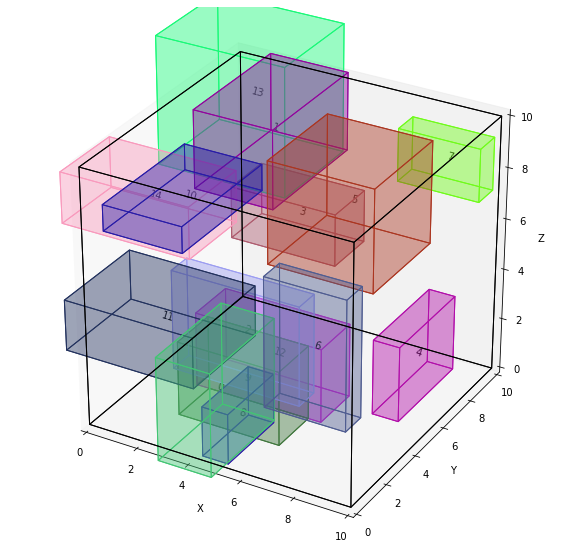

In [4]:
boite_color_list = []
for i in range(nb_composant):
    boite_color_list.append(random_mpl_color_rgba())

camion = Camion.atOrigine(C[0], C[1], C[2]);
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection="3d")    
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_xlim(-0, C[0])
ax1.set_ylim(-0, C[1])
ax1.set_zlim(-0, C[2])
ax1.grid(False)
ax1.add_collection3d(camion.getPoly3d(facecolors=(1, 1, 1, 0), edgecolors="black"))
boite_list = []
for i in range(X.shape[0]):
    boite = Boite((X[i, 0], X[i, 1], X[i, 2]), B[i, 0], B[i, 1], B[i, 2])
    boite_list.append(boite)
    ax1.add_collection3d(boite.getPoly3d(facecolors=boite_color_list[i]))
    ax1.text(*X[i, :], str(i), 'x')
plt.show()

In [5]:
## le plus haut composant
X_copy = X.copy() 
while(not np.array_equal(X_copy, -np.ones_like(X_copy))):
    highest_z = np.max(X_copy[:,2])
    idx = X_copy[:, 2] == highest_z
    msg_str = []
    for i, j in enumerate(list(idx)):
        if j == True:
            msg_str.append(i)
    print("Highest z: {}, Number of highest composant: {}".format(highest_z, msg_str))
    print("X: \n"+str(X_copy[idx]))
    print("B: \n"+str(B[idx]))
    X_copy[idx] = -1
    print("*****************************")
#     print(X_copy)


# idx = X[:,2] == np.max(X[:,2])
# for i, j  in enumerate(list(idx)):
#     if j == True:
#         print(i)
# print(X[idx])

Highest z: 9, Number of highest composant: [1, 7, 13]
X: 
[[3 7 9]
 [9 8 9]
 [1 9 9]]
B: 
[[3. 5. 3.]
 [3. 1. 2.]
 [5. 4. 5.]]
*****************************
Highest z: 8, Number of highest composant: [10]
X: 
[[2 3 8]]
B: 
[[3. 5. 1.]]
*****************************
Highest z: 7, Number of highest composant: [5, 14]
X: 
[[6 7 7]
 [0 4 7]]
B: 
[[4. 4. 4.]
 [5. 3. 2.]]
*****************************
Highest z: 6, Number of highest composant: [3]
X: 
[[4 7 6]]
B: 
[[4. 2. 2.]]
*****************************
Highest z: 5, Number of highest composant: [6]
X: 
[[8 1 5]]
B: 
[[3. 1. 5.]]
*****************************
Highest z: 3, Number of highest composant: [0, 11]
X: 
[[5 0 3]
 [1 3 3]]
B: 
[[2. 4. 4.]
 [5. 4. 2.]]
*****************************
Highest z: 2, Number of highest composant: [2]
X: 
[[3 5 2]]
B: 
[[5. 1. 4.]]
*****************************
Highest z: 1, Number of highest composant: [4]
X: 
[[8 8 1]]
B: 
[[1. 4. 3.]]
*****************************
Highest z: 0, Number of highest comp

## Function overlap2d
Judge if two rectangle overlap or not

In [6]:
def overlap2d(center_1, length_1, width_1, center_2, length_2, width_2):
    overlap_length = max(0, min(center_1[0] + length_1/2, center_2[0]+length_2/2) - 
                        max(center_1[0] - length_1/2, center_2[0] - length_2/2))
    overlap_width = max(0, min(center_1[1] + width_1/2, center_2[1]+width_2/2) - 
                        max(center_1[1] - width_1/2, center_2[1] - width_2/2))
    overlap_area = overlap_length * overlap_width 
    ret = False
    if overlap_area != 0:
        ret = True 
    return ret, overlap_area 

simple test

In [7]:
ret, _ = overlap2d(X[13], B[13][0], B[13][1], X[10], B[10][0], B[10][1])
print(ret)

False


In [8]:
X_copy = X.copy() 
gravity_layers = []
while(not np.array_equal(X_copy, -np.ones_like(X_copy))):
    highest_z = np.max(X_copy[:,2])
    idx = X_copy[:, 2] == highest_z
    gravity_layer = []
    for i, j in enumerate(list(idx)):
        if j == True:
            gravity_layer.append(i)
    gravity_layers.append(gravity_layer)
    X_copy[idx] = -1
    
print(gravity_layers)

[[1, 7, 13], [10], [5, 14], [3], [6], [0, 11], [2], [4], [8, 9, 12]]


In [9]:
temp_list = []
for idx, layer in enumerate(gravity_layers):

    if idx == len(gravity_layers) -1:
        break
    next_layer = gravity_layers[idx+1]
    print("----------------------------------------")
    print("Original layer: {};  next_layer: {}.".format(layer, next_layer))
    layer.extend(temp_list)
    print("layer: {};  next_layer: {}.".format(layer, next_layer))
    temp_list = []
    for composant_i in layer:
        overlap_flag = False
        for composant_j in next_layer:
            print(composant_i, composant_j)
            ret, overlap_area = overlap2d(X[composant_i], B[composant_i, 0], B[composant_i, 1],
                              X[composant_j], B[composant_j, 0], B[composant_j, 1])
            if(ret):
                print("overlap area: ", overlap_area)
                overlap_flag = True 
        if not overlap_flag:
            temp_list.append(composant_i)
                
    print(temp_list)

        

----------------------------------------
Original layer: [1, 7, 13];  next_layer: [10].
layer: [1, 7, 13];  next_layer: [10].
1 10
overlap area:  2.0
7 10
13 10
[7, 13]
----------------------------------------
Original layer: [10];  next_layer: [5, 14].
layer: [10, 7, 13];  next_layer: [5, 14].
10 5
10 14
overlap area:  6.0
7 5
overlap area:  0.5
7 14
13 5
13 14
[13]
----------------------------------------
Original layer: [5, 14];  next_layer: [3].
layer: [5, 14, 13];  next_layer: [3].
5 3
overlap area:  4.0
14 3
13 3
overlap area:  1.5
[14]
----------------------------------------
Original layer: [3];  next_layer: [6].
layer: [3, 14];  next_layer: [6].
3 6
14 6
[3, 14]
----------------------------------------
Original layer: [6];  next_layer: [0, 11].
layer: [6, 3, 14];  next_layer: [0, 11].
6 0
6 11
3 0
3 11
14 0
14 11
overlap area:  10.0
[6, 3]
----------------------------------------
Original layer: [0, 11];  next_layer: [2].
layer: [0, 11, 6, 3];  next_layer: [2].
0 2
11 2
overla

In [10]:
M = [1,2,3]
N = [4,5]
print(M.extend(N))
print(M)

None
[1, 2, 3, 4, 5]
